In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

rads = ["#ea5545", "#e1a692", "#DD7596", '#9A3B3B', "#b30000"]
maroon = ["#900c3f", "#c70039", '#900c3f']
COLORS_20 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
semi_balck = '#4F6272'


In [3]:
import matplotlib
plt.rcParams.update(matplotlib.rcParamsDefault)

In [4]:
results_path = "/Volumes/noamaz/modularity/xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
task_name = 'XOR'
task = "xor"
num_layers = "4"
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"{task}_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/xor_multi_arch/{res_folder}"

In [5]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = "2023-11-16-14-52-18_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"
lgbm_folder_name = 'exp_2023-11-16-17-38-02_nice_features'
n_features = 5

In [6]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [7]:
corrlated_features_values = pd.read_csv(f"/Volumes/noamaz/modularity/xor/xor_4_layers/feature_correlation/2023-11-17-11-50-45_all_data.csv")
correlated_features_csv_name = '2023-11-17-11-50-45_feature_correlation.csv'
correlated_features = pd.read_csv(f"{results_path}/{res_folder}/feature_correlation/{correlated_features_csv_name}",
                                  index_col=0)


In [8]:
first_analsis = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
first_analsis.shape

(103328, 29)

In [9]:
neurons_feature_names = [f'neurons_in_layer_{i}' for i in range(1, int(num_layers))]
dims = [f"{i}_{j}_{k}" for i, j, k in first_analsis[neurons_feature_names].values.tolist()]
dims.sort()
first_analsis['dims'] = dims

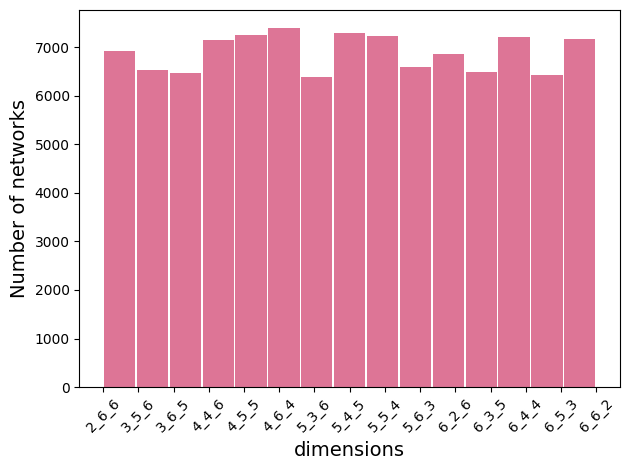

In [10]:
plt.hist(first_analsis['dims'], color=COLORS[2], bins=len(set(dims)), align='mid', rwidth=0.95)
plt.xticks(rotation=45)
plt.xlabel('dimensions', fontsize=14)
plt.ylabel('Number of networks', fontsize=14)
#axs[k].set_xlabel(f_name,  fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_dims_hist.png")
plt.show()

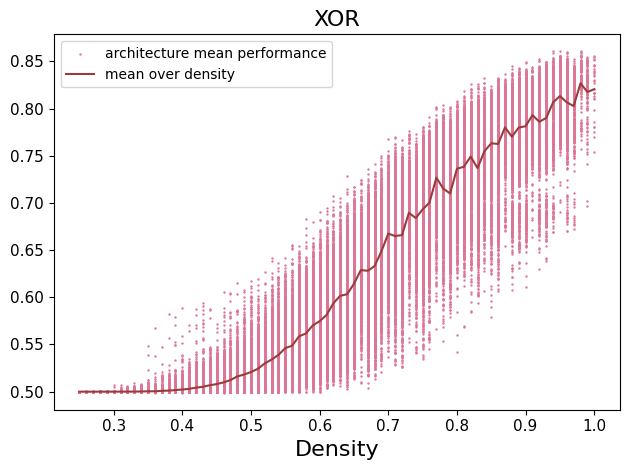

In [11]:
x_metric_name = 'density'
y_metric_name = 'mean_performance'

x_data = first_analsis[x_metric_name]
means_y = []
mean_x = []
for x in sorted(first_analsis[x_metric_name].unique()):
    means_y.append(first_analsis[y_metric_name][x_data == x].mean())
    mean_x.append(x)
#x_data = x_data + np.random.normal(-0.008, 0.008, x_data.shape[0])
plt.scatter(x_data, first_analsis[y_metric_name], c=COLORS[2], s=0.5, label='architecture mean performance')

plt.plot(mean_x, means_y, c=rads[3], label='mean over density')
plt.legend()
#plt.ylabel("Network's mean performance", fontsize=12)
plt.xlabel('Density', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.upper()}",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{y_metric_name}_vs_{x_metric_name}.png", dpi=300)
plt.show()

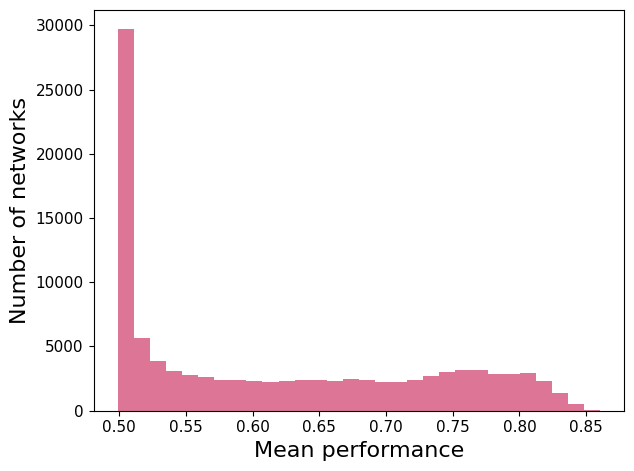

In [9]:
plt.hist(first_analsis['mean_performance'], color=COLORS[2], bins=30)
plt.xlabel('Mean performance', fontsize=16)
plt.ylabel('Number of networks', fontsize=16)
#plt.title(f"{task.upper()}", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_mean_performance_hist.png")
plt.show()

In [34]:
orignaly_chosen_features_values = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0",
                                                                                                      axis=1)
originaly_selected_feature_names = list(orignaly_chosen_features_values.columns)[:-1]
correlated_features = pd.read_csv(f"{results_path}/{res_folder}/feature_correlation/{correlated_features_csv_name}",
                                  index_col=0)
corrlated_selected_feature_names =      [
        correlated_features[feature].drop(index=feature).idxmax()
        for feature in originaly_selected_feature_names
    ]

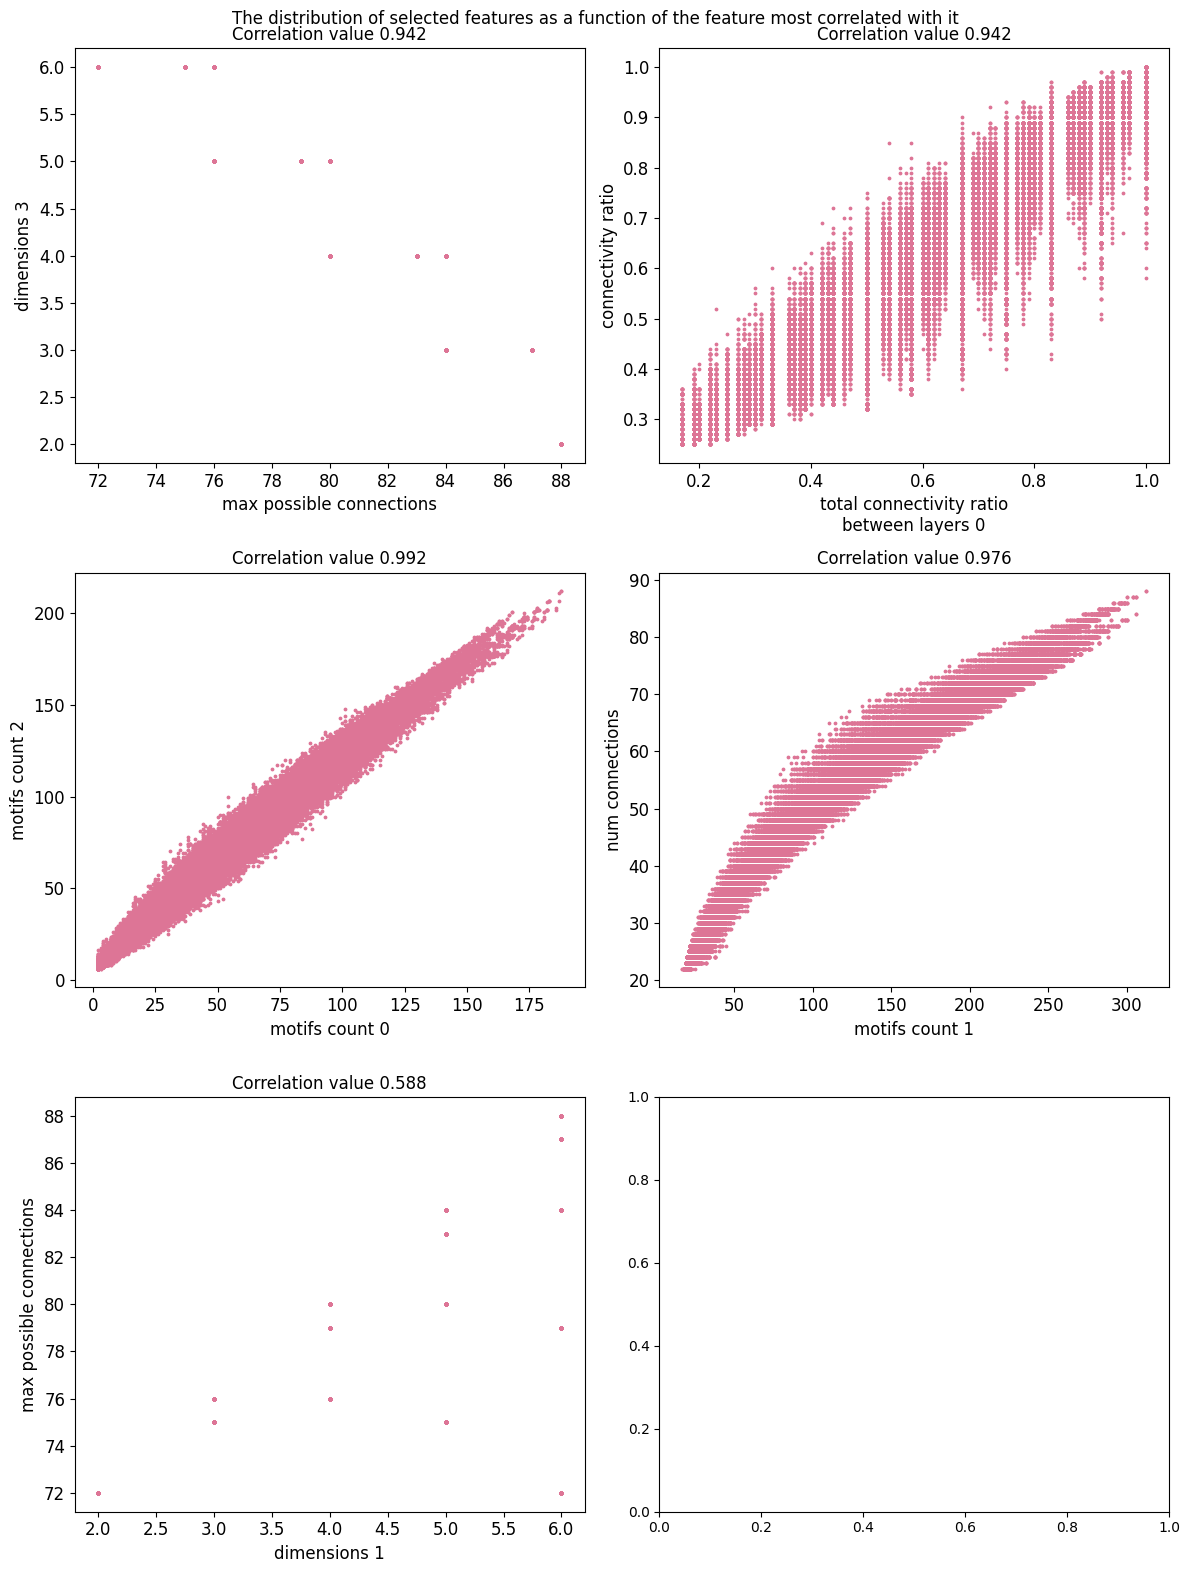

In [35]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    axs[i, j].scatter(corrlated_features_values[origin_f_name], corrlated_features_values[coor_f_name],
                      color=COLORS[2], s=3)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace ('_', ' '), width=30,
                      break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace ('_', ' '), width=30,
                      break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(f"The distribution of selected features as a function of the feature most correlated with it")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_correlated_features_dist.png")
plt.show()

In [36]:
NICE_FEATURES = [
    'connectivity_ratio',
    'num_connections',
    'max_possible_connections',
    'out_connections_per_layer',
    'in_connections_per_layer',
    'total_connectivity_ratio_between_layers',
    'max_connectivity_between_layers_per_layer',
    'layer_connectivity_rank',
    'distances_between_input_neuron',
    'num_paths_to_output_per_input_neuron',
    'num_involved_neurons_in_paths_per_input_neuron',
    'motifs_count',
    'dimensions',
    'num_layers',
    'num_neurons'
]
all_ticks = []
for feature_full_name in correlated_features.columns:
    for feature_general_name in NICE_FEATURES:
        if feature_general_name == 'connectivity_ratio' and feature_general_name !=feature_full_name:
            continue
        if feature_general_name in feature_full_name:
            all_ticks.append(feature_general_name)
labels = []
for name in all_ticks:
    if name not in labels:
        labels.append(name)
texts = []
colors_ = []
for i, tick in enumerate(labels):
    temp = [i for i,val in enumerate(all_ticks) if val==tick]
    tick = tick.replace('connectivity_ratio', 'density').replace('_', ' ')
    if len(temp) == 1:
        texts.append(f"{temp[0]}: {tick}")
    else:
        texts.append(f"{temp[0]} - {temp[-1]}: {tick}")
    for j in range(temp[-1]-temp[0] +1 ):
        colors_.append(COLORS_20[i])

In [ ]:
col = 'Reds'

fig = plt.figure(figsize=(18,12), constrained_layout=True, dpi = 300)
gs = fig.add_gridspec(2, 4)
axs=[]
axs.append( fig.add_subplot(gs[:,3]) )
axs.append( fig.add_subplot(gs[:,0:3]) ) # large subplot (2 rows, 2 columns)
axtxt, ax= axs
c = sns.color_palette(col, as_cmap=True)
ax = sns.heatmap(correlated_features, linewidth=0.5, cmap=c, )
ax.set_xticks(range(0, correlated_features.shape[0], 1))
ax.set_xticklabels(list((range(0, correlated_features.shape[0], 1))))
ax.set_yticks(range(0, correlated_features.shape[0], 1))
ax.set_yticklabels(list((range(0, correlated_features.shape[0], 1))))
for xtick, yticks, color,  in zip(ax.get_xticklabels(),ax.get_yticklabels(), colors_):
    xtick.set_color(color)
    yticks.set_color(color)
axtxt.set_axis_off()
left, width = 0.0, .5
top, height = 0.95, 1
right = left + width
bottom = top- height
for i, (t, c) in enumerate(zip(texts, COLORS_20)):
    axtxt.text(0.5*(left+right), ((top) - i*0.03), t,
        horizontalalignment='left',
        verticalalignment='top',
        fontsize=12, color=c,
      #  transform=axtxt.transAxes,
            )
plt.title(f"{task} - feature correlation (abs)")
plt.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation.png")
plt.show()
print('a')




In [ ]:
plt.figure(figsize=(26,24), dpi = 300)
c = sns.color_palette(col, as_cmap=True)
correlated_features_new_name = correlated_features.copy()
correlated_features_new_name.columns = all_ticks
correlated_features_new_name.index = all_ticks
s =sns.clustermap(correlated_features_new_name, linewidth=0.5, cmap=c,cbar_pos=(1,0.21,0.03,0.6,),figsize=(26,24))
s.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation_with_clustering.png")
plt.show()

In [9]:
first_analsis['density' , 'motifs_count_0', 'motifs_count_1']

Index(['Unnamed: 0', 'exp_name', 'modularity', 'num_connections', 'entropy',
       'normed_entropy', 'density', 'motifs_count_0', 'motifs_count_1',
       'motifs_count_2', 'neurons_in_layer_0', 'neurons_in_layer_1',
       'neurons_in_layer_2', 'neurons_in_layer_3', 'neurons_in_layer_4',
       'num_layers', 'num_neurons', 'max_possible_connections',
       'normalized_motifs_count_0', 'normalized_motifs_count_1',
       'normalized_motifs_count_2', 'normalized_entropy',
       'normalized_normed_entropy', 'median_performance', 'mean_performance',
       'performance_std', 'max_performance', 'num_successes_1.0',
       'success_percent_1.0'],
      dtype='object')

In [9]:
from scipy.stats import pearsonr
for col in ['density' , 'motifs_count_0', 'motifs_count_1', 'motifs_count_2', 'max_possible_connections' ,'num_connections']:
    print(col, round(abs(pearsonr(first_analsis[col],first_analsis['mean_performance']).statistic), 3))

density 0.936
motifs_count_0 0.937
motifs_count_1 0.942
motifs_count_2 0.947
max_possible_connections 0.072
num_connections 0.942
